In [1]:
!pip install xarray cfgrib netCDF4 cartopy


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 1.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.9/48.9 kB 982.4 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 32.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 22.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 26.7 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd
import statsmodels.formula.api as smf


# Laden der ERA-5 Daten für Sommer 2022, 10 Uhr, 2m-Temperatur

In [4]:
noe_klimadaten_path = "/content/drive/MyDrive/Daten BA /ERA-5 Daten/noe_2022_10_00.grib"
kempt_klimadaten_path = "/content/drive/MyDrive/Daten BA /ERA-5 Daten/kemp_2022_10_00.grib"
ing_klimadaten_path = "/content/drive/MyDrive/Daten BA /ERA-5 Daten/ing_2022_10_00.grib"

In [6]:
# Definiere die Pfade zu den .grib-Dateien
noe_klimadaten_path = "/content/drive/MyDrive/Daten BA /ERA-5 Daten/noe_2022_10_00.grib"
kempt_klimadaten_path = "/content/drive/MyDrive/Daten BA /ERA-5 Daten/kemp_2022_10_00grib"
ing_klimadaten_path = "/content/drive/MyDrive/Daten BA /ERA-5 Daten/ing_2022_10_00.grib"

# Öffne die .grib-Dateien mit xarray
noe_2022_10_00_daten = xr.open_dataset(noe_klimadaten_path, engine="cfgrib", decode_timedelta=False)
kempt_2022_10_00_daten = xr.open_dataset(kempt_klimadaten_path, engine="cfgrib", decode_timedelta=False)
ing_2022_10_00_daten = xr.open_dataset(ing_klimadaten_path, engine="cfgrib", decode_timedelta=False)
# Extrahiere die Temperaturdaten und Koordinaten
# (Anpassen an die tatsächlichen Variablennamen in den .grib-Dateien)
noe_temp = noe_2022_10_00_daten["t2m"]  # Beispiel: "t2m" für 2m-Temperatur
noe_lat = noe_2022_10_00_daten["latitude"]
noe_lon = noe_2022_10_00_daten["longitude"]

kempt_temp = kempt_2022_10_00_daten["t2m"]
kempt_lat = kempt_2022_10_00_daten["latitude"]
kempt_lon = kempt_2022_10_00_daten["longitude"]

ing_temp = ing_2022_10_00_daten["t2m"]
ing_lat = ing_2022_10_00_daten["latitude"]
ing_lon = ing_2022_10_00_daten["longitude"]

# Rechne die Temperaturdaten von Kelvin in Celsius um
noe_temp = noe_temp - 273.15
kempt_temp = kempt_temp - 273.15
ing_temp = ing_temp - 273.15



def print_10_uhr_temp(dataset, stadtname, latitude, longitude):
  """
  Prints a table of temperatures at 10:00 AM for a specific location.

  Args:
    dataset: The xarray dataset containing temperature data.
    stadtname: The name of the city.
    latitude: The latitude of the city.
    longitude: The longitude of the city.
  """
  temp_data = dataset["t2m"].sel(latitude=latitude, longitude=longitude, method="nearest") - 273.15  # Convert to Celsius

  # Convert to Pandas DataFrame for better display
  df = temp_data.to_dataframe(name="Temperatur (°C)")
  df.index.name = "Date"  # Rename index to "Date"

  print(f"Temperaturen um 10:00 Uhr für {stadtname}:\n")
  print(df)
  print("\n")
  return df

# Koordinaten der Städte
latitude_noerdlingen = 48.85
longitude_noerdlingen = 10.49
latitude_kempten = 47.72
longitude_kempten = 10.32
latitude_ingolstadt = 48.76
longitude_ingolstadt = 11.42

# Aufruf der Funktion für jede Stadt
print_10_uhr_temp(noe_2022_10_00_daten, "Nördlingen", latitude_noerdlingen, longitude_noerdlingen)
print_10_uhr_temp(kempt_2022_10_00_daten, "Kempten", latitude_kempten, longitude_kempten)
print_10_uhr_temp(ing_2022_10_00_daten, "Ingolstadt", latitude_ingolstadt, longitude_ingolstadt)

# Aufruf der Funktion für jede Stadt und Speichern der DataFrames
df_noerdlingen = print_10_uhr_temp(noe_2022_10_00_daten, "Nördlingen", latitude_noerdlingen, longitude_noerdlingen)
df_kempten = print_10_uhr_temp(kempt_2022_10_00_daten, "Kempten", latitude_kempten, longitude_kempten)
df_ingolstadt = print_10_uhr_temp(ing_2022_10_00_daten, "Ingolstadt", latitude_ingolstadt, longitude_ingolstadt)



Temperaturen um 10:00 Uhr für Nördlingen:

                     number  step  surface  latitude  longitude  \
Date                                                              
2022-06-01 10:00:00       0   0.0      0.0     48.65      10.27   
2022-06-02 10:00:00       0   0.0      0.0     48.65      10.27   
2022-06-03 10:00:00       0   0.0      0.0     48.65      10.27   
2022-06-04 10:00:00       0   0.0      0.0     48.65      10.27   
2022-06-05 10:00:00       0   0.0      0.0     48.65      10.27   
...                     ...   ...      ...       ...        ...   
2022-08-27 10:00:00       0   0.0      0.0     48.65      10.27   
2022-08-28 10:00:00       0   0.0      0.0     48.65      10.27   
2022-08-29 10:00:00       0   0.0      0.0     48.65      10.27   
2022-08-30 10:00:00       0   0.0      0.0     48.65      10.27   
2022-08-31 10:00:00       0   0.0      0.0     48.65      10.27   

                             valid_time  Temperatur (°C)  
Date                      

Code zeigt die Temperaturen um 10 Uhr für jede Stadt im Zeitraum Juni bis August 2024 an. Auf Basis dessen können nun statistische Vergleiche mit den LST-Daten gemacht werden  

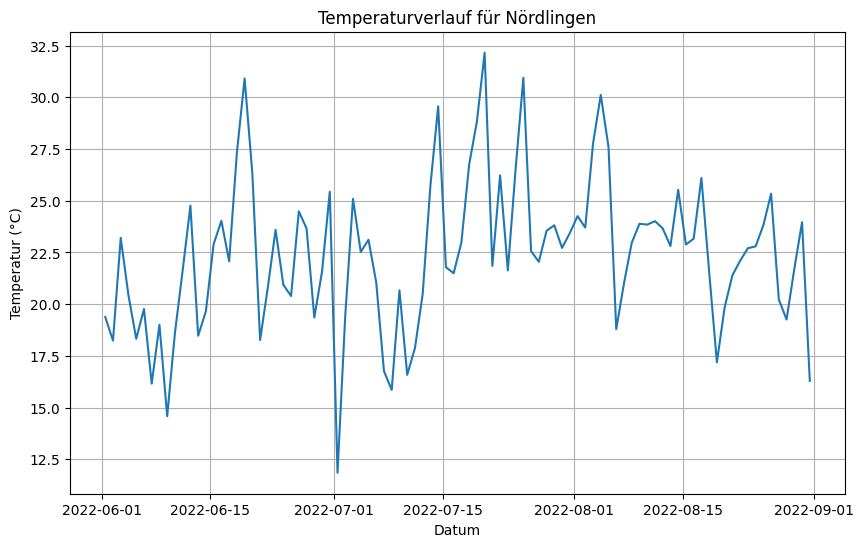

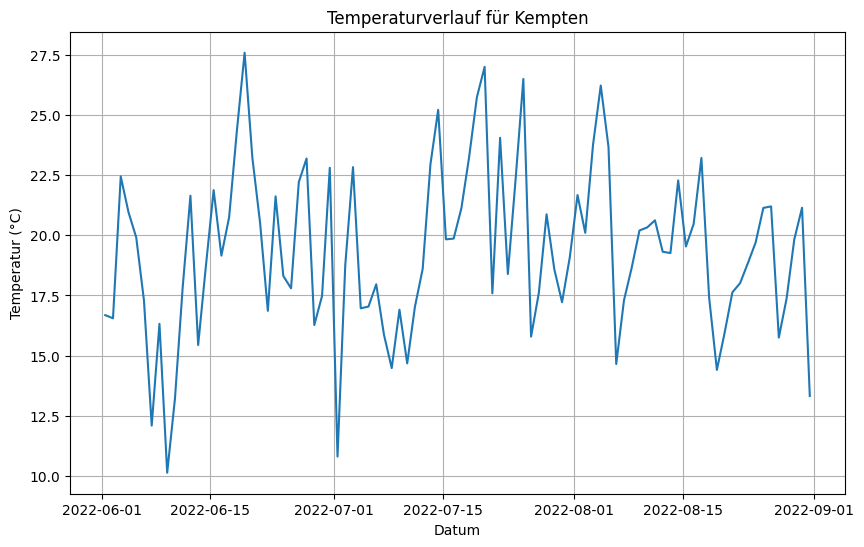

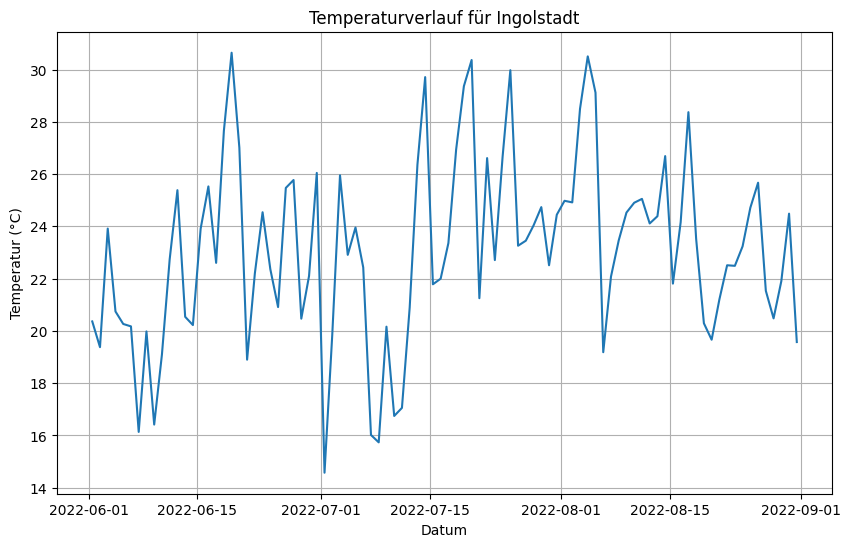

In [7]:
# Funktion zum Plotten der Temperaturdaten
def plot_temperaturen(df, stadtname):  # df als Argument hinzugefügt
    """
    Plots the temperature data for a specific location.

    Args:
        df: The Pandas DataFrame containing temperature data.
        stadtname: The name of the city.
    """

    # Plot the data
    plt.figure(figsize=(10, 6))  # Adjust figure size if needed
    plt.plot(df.index, df["Temperatur (°C)"])  # Spaltenname angepasst
    plt.title(f"Temperaturverlauf für {stadtname}")
    plt.xlabel("Datum")
    plt.ylabel("Temperatur (°C)")  # Einheit angepasst
    plt.grid(True)
    plt.show()

# Koordinaten der Städte

latitude_noerdlingen = 48.85
longitude_noerdlingen = 10.49
latitude_kempten = 47.72
longitude_kempten = 10.32
latitude_ingolstadt = 48.76
longitude_ingolstadt = 11.42

# Aufruf der plot_temperaturen Funktion mit den DataFrames
plot_temperaturen(df_noerdlingen, "Nördlingen")
plot_temperaturen(df_kempten, "Kempten")
plot_temperaturen(df_ingolstadt, "Ingolstadt")

als nächstes: um mit L8 Daten zuvergleichen, müssen über Stadtgebiet gemittelte LST Werte jeder einzelnen Szene berechnet werden. Diese werden dann als Punkte den obenstehenen Graphen hinzugefügt (=> Zeitreihe mit punktuellen LST-Werten) und verglichen

L8 LST Daten werden in LST Notebook extrahiert

benötigt:

landsat_dates:

lst_values (der landsat dates):

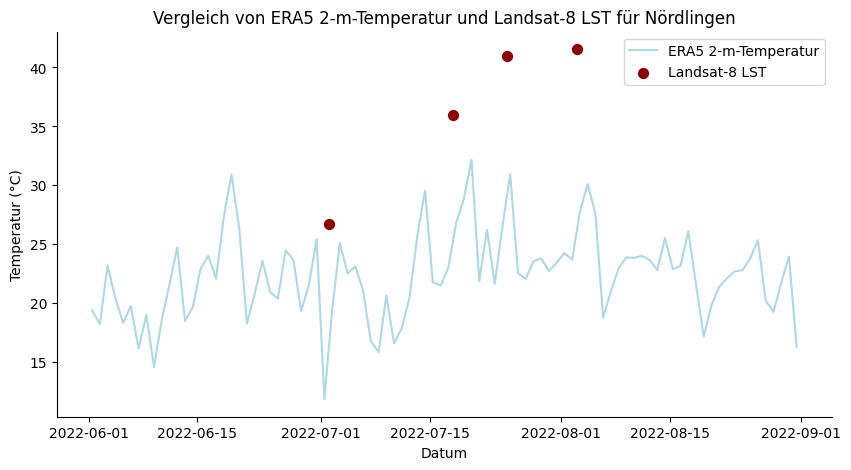

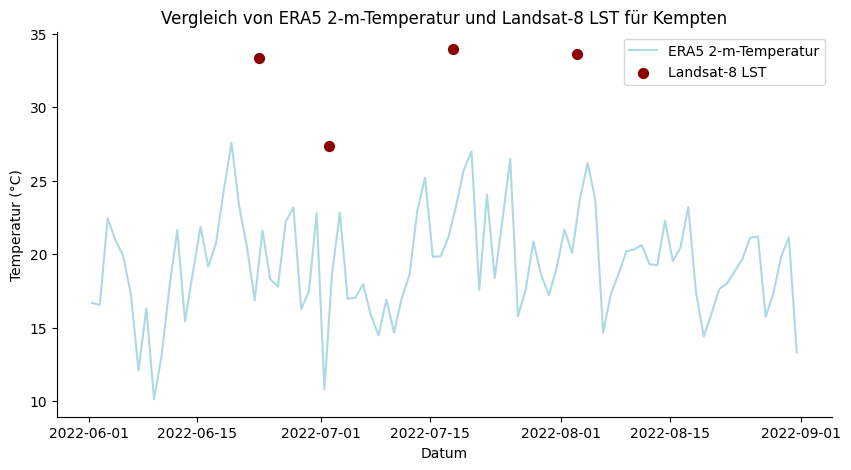

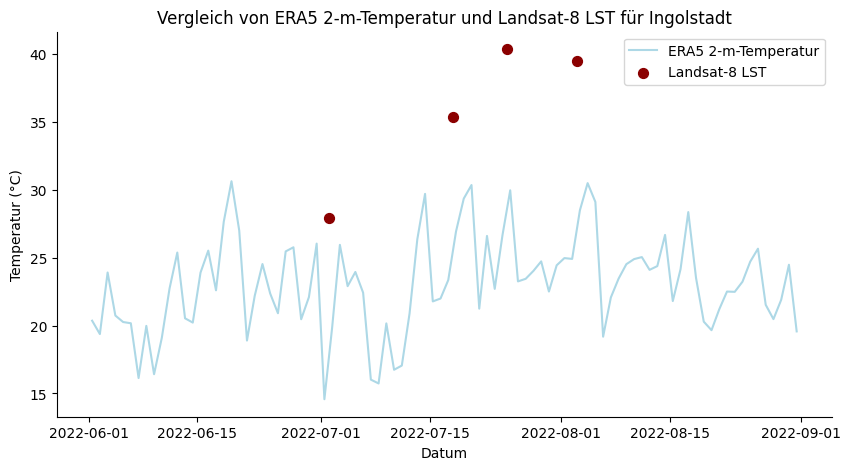

In [12]:
def plot_temperaturen_mit_landsat(df_era5, stadtname, landsat_dates, lst_values):
    """
    Plots ERA5 temperature data and Landsat LST data for a specific location.

    Args:
        df_era5: The Pandas DataFrame containing ERA5 temperature data.
        stadtname: The name of the city.
        landsat_dates: A list of Landsat observation dates as pandas DatetimeIndex.
        lst_values: A list of Landsat LST values in °C.
    """

    fig, ax = plt.subplots(figsize=(10, 5)) # Define fig and ax using subplots
    plt.plot(df_era5.index, df_era5["Temperatur (°C)"], label="ERA5 2-m-Temperatur", color='lightblue', linestyle="-")
    plt.scatter(landsat_dates, lst_values, color='darkred', label="Landsat-8 LST", s=50, marker="o")

    plt.xlabel("Datum")
    plt.ylabel("Temperatur (°C)")
    plt.title(f"Vergleich von ERA5 2-m-Temperatur und Landsat-8 LST für {stadtname}")
    plt.legend()
    plt.grid()

    ax.spines['right'].set_visible(False)  # Rechten Rahmen ausblenden
    ax.spines['top'].set_visible(False)    # Oberen Rahmen ausblenden

    ax.grid(False)

    plt.show()

# Daten für Nördlingen
landsat_dates_noerdlingen = pd.to_datetime(["2022-07-02", "2022-07-18", "2022-08-03", "2022-07-25"])  # Ersetze mit deinen Daten
lst_values_noerdlingen = [26.751536544270945, 35.93774910237807, 41.55074500854063,40.95924024354462]  # Ersetze mit deinen Daten

# Daten für Kempten
landsat_dates_kempten = pd.to_datetime(["2022-07-02", "2022-07-18", "2022-08-03", "2022-06-23"])  # Ersetze mit deinen Daten
lst_values_kempten = [27.375269431896495, 33.93969350549736, 33.636602478897295, 33.36710151665095]  # Ersetze mit deinen Daten

# Daten für Ingolstadt
landsat_dates_ingolstadt = pd.to_datetime(["2022-07-02", "2022-07-18", "2022-08-03", "2022-07-25"])  # Ersetze mit deinen Daten
lst_values_ingolstadt = [27.970091093220056, 35.41030019589851, 39.487901987705776, 40.380992331493694]  # Ersetze mit deinen Daten

# => Daten und Werte wurden Output von Notebook LST aus L8 generalisiert entnommen (Überschrift: absolute LST Werte berechnen)

# Plotten der Daten für alle drei Städte
plot_temperaturen_mit_landsat(df_noerdlingen, "Nördlingen", landsat_dates_noerdlingen, lst_values_noerdlingen)
plot_temperaturen_mit_landsat(df_kempten, "Kempten", landsat_dates_kempten, lst_values_kempten)
plot_temperaturen_mit_landsat(df_ingolstadt, "Ingolstadt", landsat_dates_ingolstadt, lst_values_ingolstadt)

um die L8 Daten zu validieren, wurden die ERA-5 Daten (2-m Temperatur= im Zeitraum Juni bis August 2024, 10 Uhr (Aufnahmedatum Landsat) geplottet

Dann wurden die Landsat-Szenen, die zur LST Berechnung erfolgten, verwendet. Hierbei wurde für jede Szene die **mittlere LST des gesamten Stadtgebiets** berechnet. Diese wurde dann als Punktsignatur in den Plot hinzugefügt.

bei optischer Interpretation lässt sich bereits erkennen, dass die Werte gültig sind, denn die LST zeigt hohe Werte, wo auch die Lufttemperaturen hoch sind. Die LST ist bei Sonneneinstrahlung immer etwas höher, als die Lufttemperatur, was die Graphen auch bestätigen.

# Vergleich bei verschiedenen Cloud Covern

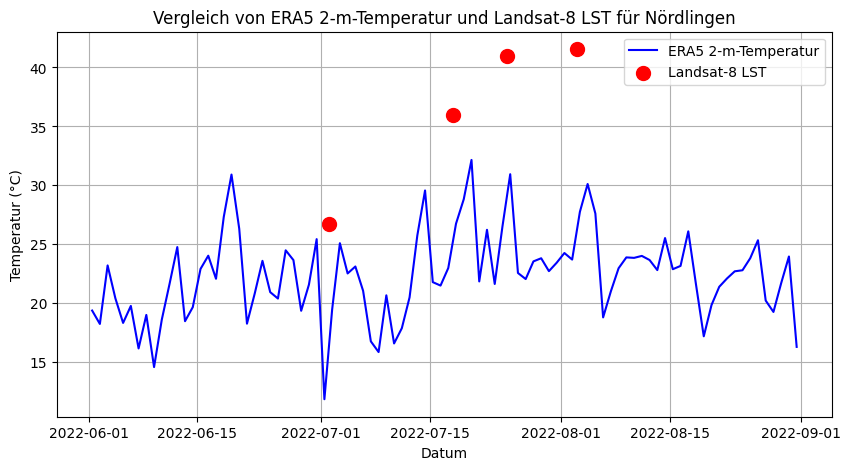

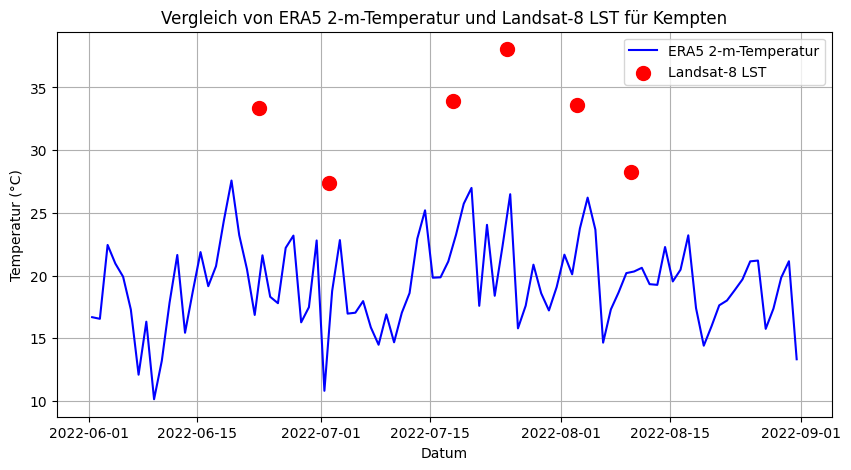

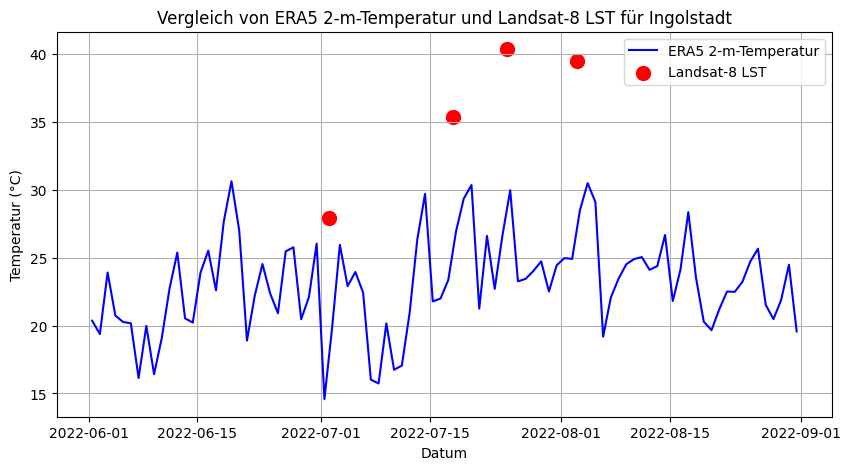

In [13]:
# 10% CC
def plot_temperaturen_mit_landsat(df_era5, stadtname, landsat_dates, lst_values):
    """
    Plots ERA5 temperature data and Landsat LST data for a specific location.

    Args:
        df_era5: The Pandas DataFrame containing ERA5 temperature data.
        stadtname: The name of the city.
        landsat_dates: A list of Landsat observation dates as pandas DatetimeIndex.
        lst_values: A list of Landsat LST values in °C.
    """

    plt.figure(figsize=(10, 5))
    plt.plot(df_era5.index, df_era5["Temperatur (°C)"], label="ERA5 2-m-Temperatur", color='blue', linestyle="-")
    plt.scatter(landsat_dates, lst_values, color='red', label="Landsat-8 LST", s=100, marker="o")

    plt.xlabel("Datum")
    plt.ylabel("Temperatur (°C)")
    plt.title(f"Vergleich von ERA5 2-m-Temperatur und Landsat-8 LST für {stadtname}")
    plt.legend()
    plt.grid()
    plt.show()

# Daten für Nördlingen
landsat_dates_noerdlingen = pd.to_datetime(["2022-07-02", "2022-07-18", "2022-08-03", "2022-07-25"])  # Ersetze mit deinen Daten
lst_values_noerdlingen = [26.751536544270945, 35.93774910237807, 41.55074500854063,40.95924024354462]  # Ersetze mit deinen Daten

# Daten für Kempten
landsat_dates_kempten = pd.to_datetime(["2022-07-02", "2022-07-18", "2022-08-03", "2022-06-23", '2022-07-25', '2022-08-10' ])  # Ersetze mit deinen Daten
lst_values_kempten = [27.375269431896495, 33.93969350549736, 33.636602478897295, 33.36710151665095, 38.048429880815576, 28.23760112261903]  # Ersetze mit deinen Daten

# Daten für Ingolstadt
landsat_dates_ingolstadt = pd.to_datetime(["2022-07-02", "2022-07-18", "2022-08-03", "2022-07-25"])  # Ersetze mit deinen Daten
lst_values_ingolstadt = [27.970091093220056, 35.41030019589851, 39.487901987705776, 40.380992331493694]  # Ersetze mit deinen Daten

# => Daten und Werte wurden Output von Notebook LST aus L8 generalisiert entnommen (Überschrift: absolute LST Werte berechnen)

# Plotten der Daten für alle drei Städte
plot_temperaturen_mit_landsat(df_noerdlingen, "Nördlingen", landsat_dates_noerdlingen, lst_values_noerdlingen)
plot_temperaturen_mit_landsat(df_kempten, "Kempten", landsat_dates_kempten, lst_values_kempten)
plot_temperaturen_mit_landsat(df_ingolstadt, "Ingolstadt", landsat_dates_ingolstadt, lst_values_ingolstadt)

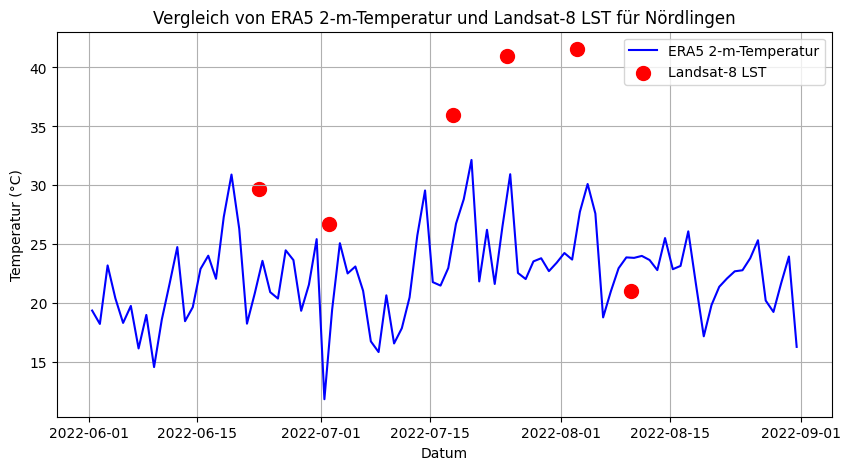

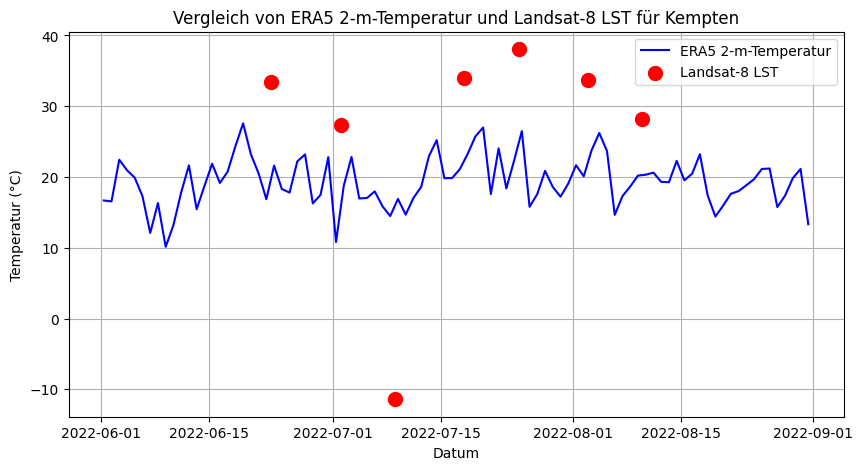

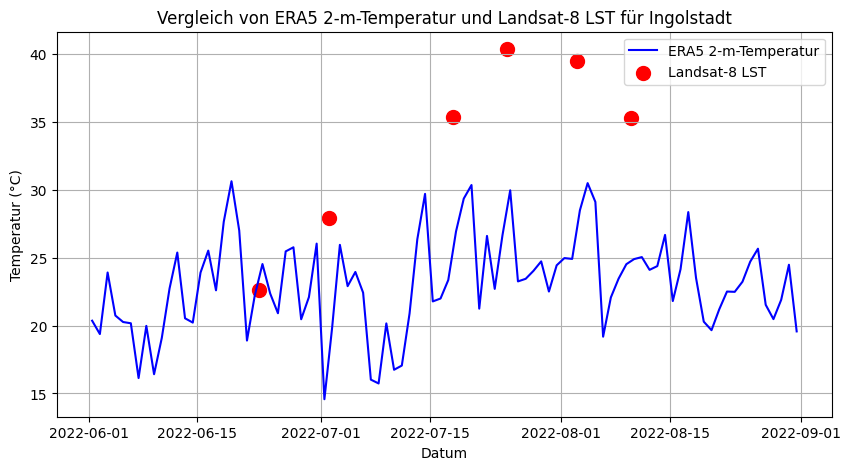

In [14]:
# 20% CC
def plot_temperaturen_mit_landsat(df_era5, stadtname, landsat_dates, lst_values):
    """
    Plots ERA5 temperature data and Landsat LST data for a specific location.

    Args:
        df_era5: The Pandas DataFrame containing ERA5 temperature data.
        stadtname: The name of the city.
        landsat_dates: A list of Landsat observation dates as pandas DatetimeIndex.
        lst_values: A list of Landsat LST values in °C.
    """

    plt.figure(figsize=(10, 5))
    plt.plot(df_era5.index, df_era5["Temperatur (°C)"], label="ERA5 2-m-Temperatur", color='blue', linestyle="-")
    plt.scatter(landsat_dates, lst_values, color='red', label="Landsat-8 LST", s=100, marker="o")

    plt.xlabel("Datum")
    plt.ylabel("Temperatur (°C)")
    plt.title(f"Vergleich von ERA5 2-m-Temperatur und Landsat-8 LST für {stadtname}")
    plt.legend()
    plt.grid()
    plt.show()

# Daten für Nördlingen
landsat_dates_noerdlingen = pd.to_datetime(["2022-07-02", "2022-07-18", "2022-08-03", "2022-07-25", '2022-06-23', '2022-08-10' ])  # Ersetze mit deinen Daten
lst_values_noerdlingen = [26.751536544270945, 35.93774910237807, 41.55074500854063,40.95924024354462,  29.70667861301319, 21.00391934838771]  # Ersetze mit deinen Daten

# Daten für Kempten
landsat_dates_kempten = pd.to_datetime(["2022-07-02", "2022-07-18", "2022-08-03", "2022-06-23", '2022-07-25', '2022-08-10', '2022-07-09' ])  # Ersetze mit deinen Daten
lst_values_kempten = [27.375269431896495, 33.93969350549736, 33.636602478897295, 33.36710151665095, 38.048429880815576, 28.23760112261903, -11.394271013865263, ]  # Ersetze mit deinen Daten

# Daten für Ingolstadt
landsat_dates_ingolstadt = pd.to_datetime(["2022-07-02", "2022-07-18", "2022-08-03", "2022-07-25", '2022-06-23', '2022-08-10'])  # Ersetze mit deinen Daten
lst_values_ingolstadt = [27.970091093220056, 35.41030019589851, 39.487901987705776, 40.380992331493694, 22.661880898180947, 35.27869110939265]  # Ersetze mit deinen Daten

# => Daten und Werte wurden Output von Notebook LST aus L8 generalisiert entnommen (Überschrift: absolute LST Werte berechnen)

# Plotten der Daten für alle drei Städte
plot_temperaturen_mit_landsat(df_noerdlingen, "Nördlingen", landsat_dates_noerdlingen, lst_values_noerdlingen)
plot_temperaturen_mit_landsat(df_kempten, "Kempten", landsat_dates_kempten, lst_values_kempten)
plot_temperaturen_mit_landsat(df_ingolstadt, "Ingolstadt", landsat_dates_ingolstadt, lst_values_ingolstadt)

# Korrelation LST und T- Daten

In [15]:
def berechne_korrelation(df_era5, landsat_dates, lst_values):
    """
    Berechnet die Korrelation zwischen ERA5 2-m-Temperaturen und Landsat-LST-Werten.

    Args:
        df_era5: Der Pandas DataFrame mit den ERA5-Temperaturdaten.
        landsat_dates: Eine Liste der Landsat-Beobachtungsdaten als pandas DatetimeIndex.
        lst_values: Eine Liste der Landsat-LST-Werte in °C.
    Returns:
        Die Korrelation zwischen den beiden Datensätzen, und den merged_df.
    """

    # Setze den Zeitstempel auf 10:00 Uhr für die Landsat-Daten
    landsat_dates = landsat_dates + pd.Timedelta(hours=10)

    # Erstelle einen DataFrame aus den Landsat-Daten
    landsat_df = pd.DataFrame({'Datum': landsat_dates, 'LST': lst_values})
    landsat_df = landsat_df.set_index('Datum')

    # Führe einen Join der DataFrames basierend auf dem Datum durch
    merged_df = pd.merge(df_era5, landsat_df, left_index=True, right_index=True, how='inner')

    # Berechne die Korrelation zwischen den Spalten 'Temperatur (°C)' und 'LST'
    korrelation = merged_df['Temperatur (°C)'].corr(merged_df['LST'])

    return korrelation, merged_df

# Daten für Kempten
landsat_dates_kempten = pd.to_datetime(["2022-07-02", "2022-07-18", "2022-08-03", "2022-06-23"])
lst_values_kempten = [27.375269431896495, 33.93969350549736, 33.636602478897295, 33.36710151665095]

# Daten für Ingolstadt
landsat_dates_ingolstadt = pd.to_datetime(["2022-07-02", "2022-07-18", "2022-08-03", "2022-07-25"])
lst_values_ingolstadt = [27.970091093220056, 35.41030019589851, 39.487901987705776, 40.380992331493694]

# Daten für Nördlingen
landsat_dates_noerdlingen = pd.to_datetime(["2022-07-02", "2022-07-18", "2022-08-03", "2022-07-25"])
lst_values_noerdlingen = [26.751536544270945, 35.93774910237807, 41.55074500854063, 40.95924024354462]

# Korrelation berechnen
korrelation_kempten = berechne_korrelation(df_kempten, landsat_dates_kempten, lst_values_kempten)
korrelation_ingolstadt = berechne_korrelation(df_ingolstadt, landsat_dates_ingolstadt, lst_values_ingolstadt)
korrelation_noerdlingen = berechne_korrelation(df_noerdlingen, landsat_dates_noerdlingen, lst_values_noerdlingen)

# Ergebnisse ausgeben
print(f"Korrelation für Kempten: {korrelation_kempten}")
print(f"Korrelation für Ingolstadt: {korrelation_ingolstadt}")
print(f"Korrelation für Nördlingen: {korrelation_noerdlingen}")

Korrelation für Kempten: (np.float64(0.932820209576781),                      number  step  surface  latitude  longitude  \
2022-06-23 10:00:00       0   0.0      0.0     47.52      10.19   
2022-07-02 10:00:00       0   0.0      0.0     47.52      10.19   
2022-07-18 10:00:00       0   0.0      0.0     47.52      10.19   
2022-08-03 10:00:00       0   0.0      0.0     47.52      10.19   

                             valid_time  Temperatur (°C)        LST  
2022-06-23 10:00:00 2022-06-23 10:00:00        21.612946  33.367102  
2022-07-02 10:00:00 2022-07-02 10:00:00        18.761383  27.375269  
2022-07-18 10:00:00 2022-07-18 10:00:00        23.252350  33.939694  
2022-08-03 10:00:00 2022-08-03 10:00:00        23.748932  33.636602  )
Korrelation für Ingolstadt: (np.float64(0.9876938104321866),                      number  step  surface  latitude  longitude  \
2022-07-02 10:00:00       0   0.0      0.0     48.73      11.32   
2022-07-18 10:00:00       0   0.0      0.0     48.73      11.

# Regression LST und T

In [16]:
def berechne_regression(df_era5, landsat_dates, lst_values, stadtname):
    """
    Berechnet die lineare Regression zwischen ERA5 2-m-Temperaturen und Landsat-LST-Werten.

    Args:
        df_era5: Der Pandas DataFrame mit den ERA5-Temperaturdaten.
        landsat_dates: Eine Liste der Landsat-Beobachtungsdaten als pandas DatetimeIndex.
        lst_values: Eine Liste der Landsat-LST-Werte in °C.
        stadtname: Der Name der Stadt.

    Returns:
        Die Ergebnisse der Regressionsanalyse.
    """
    # Setze den Zeitstempel auf 10:00 Uhr für die Landsat-Daten
    landsat_dates = landsat_dates + pd.Timedelta(hours=10)

    # Erstelle einen DataFrame aus den Landsat-Daten
    landsat_df = pd.DataFrame({'Datum': landsat_dates, 'LST': lst_values})
    landsat_df = landsat_df.set_index('Datum')

    # Führe einen Join der DataFrames basierend auf dem Datum durch
    merged_df = pd.merge(df_era5, landsat_df, left_index=True, right_index=True, how='inner')

    # Rename the column to a valid Python identifier
    merged_df = merged_df.rename(columns={"Temperatur (°C)": "Temperatur"})

    # Regressionsmodell erstellen using the renamed column
    model = smf.ols('LST ~ Temperatur', data=merged_df)

    # Modell anpassen
    results = model.fit()

    print(f"Regressionsergebnisse für {stadtname}:\n")
    print(results.summary())
    print("\n" + "=" * 50 + "\n")  # Trennlinie zur besseren Übersicht

    return results

# Daten für Kempten
landsat_dates_kempten = pd.to_datetime(["2022-07-02", "2022-07-18", "2022-08-03", "2022-06-23"])
lst_values_kempten = [27.375269431896495, 33.93969350549736, 33.636602478897295, 33.36710151665095]

# Daten für Ingolstadt
landsat_dates_ingolstadt = pd.to_datetime(["2022-07-02", "2022-07-18", "2022-08-03", "2022-07-25"])
lst_values_ingolstadt = [27.970091093220056, 35.41030019589851, 39.487901987705776, 40.380992331493694]

# Daten für Nördlingen
landsat_dates_noerdlingen = pd.to_datetime(["2022-07-02", "2022-07-18", "2022-08-03", "2022-07-25"])
lst_values_noerdlingen = [26.751536544270945, 35.93774910237807, 41.55074500854063, 40.95924024354462]

# Regression für alle drei Städte berechnen
berechne_regression(df_kempten, landsat_dates_kempten, lst_values_kempten, "Kempten")
berechne_regression(df_ingolstadt, landsat_dates_ingolstadt, lst_values_ingolstadt, "Ingolstadt")
berechne_regression(df_noerdlingen, landsat_dates_noerdlingen, lst_values_noerdlingen, "Nördlingen")

Regressionsergebnisse für Kempten:

                            OLS Regression Results                            
Dep. Variable:                    LST   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     13.40
Date:                Thu, 10 Apr 2025   Prob (F-statistic):             0.0672
Time:                        09:03:26   Log-Likelihood:                -5.6008
No. Observations:                   4   AIC:                             15.20
Df Residuals:                       2   BIC:                             13.97
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3

/usr/local/lib/python3.11/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/usr/local/lib/python3.11/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
/usr/local/lib/python3.11/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


LST als abhängige Variable, T als unabhängige => LST wird vorhergesagt




# Plot mit Zusammenhang ERA-5 und Landsat Daten
für verschiedene Cloud Cover, in dem z.b jede Stadt andere Form hat


Temperaturen um 10:00 Uhr für Nördlingen:

                     number  step  surface  latitude  longitude  \
Date                                                              
2022-06-01 10:00:00       0   0.0      0.0     48.65      10.27   
2022-06-02 10:00:00       0   0.0      0.0     48.65      10.27   
2022-06-03 10:00:00       0   0.0      0.0     48.65      10.27   
2022-06-04 10:00:00       0   0.0      0.0     48.65      10.27   
2022-06-05 10:00:00       0   0.0      0.0     48.65      10.27   
...                     ...   ...      ...       ...        ...   
2022-08-27 10:00:00       0   0.0      0.0     48.65      10.27   
2022-08-28 10:00:00       0   0.0      0.0     48.65      10.27   
2022-08-29 10:00:00       0   0.0      0.0     48.65      10.27   
2022-08-30 10:00:00       0   0.0      0.0     48.65      10.27   
2022-08-31 10:00:00       0   0.0      0.0     48.65      10.27   

                             valid_time  Temperatur (°C)  
Date                      

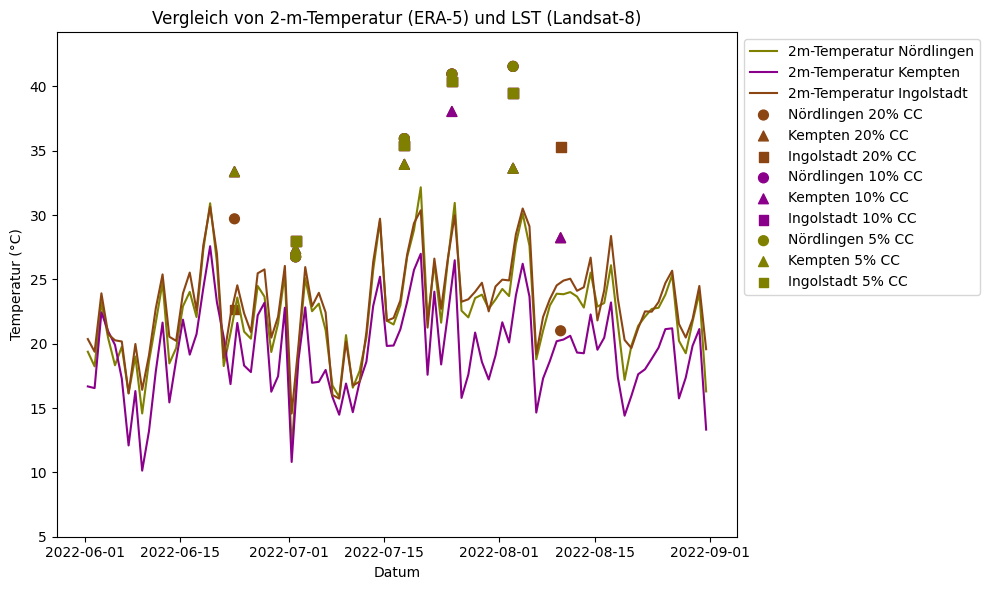

In [17]:
# ERA-5 Daten für Nördlingen, Kempten und Ingolstadt
df_noerdlingen = print_10_uhr_temp(noe_2022_10_00_daten, "Nördlingen", latitude_noerdlingen, longitude_noerdlingen)
df_kempten = print_10_uhr_temp(kempt_2022_10_00_daten, "Kempten", latitude_kempten, longitude_kempten)
df_ingolstadt = print_10_uhr_temp(ing_2022_10_00_daten, "Ingolstadt", latitude_ingolstadt, longitude_ingolstadt)

# Landsat Daten
landsat_dates_noerdlingen = pd.to_datetime(["2022-07-02", "2022-07-18", "2022-08-03", "2022-07-25", '2022-06-23', '2022-08-10'])
landsat_dates_kempten = pd.to_datetime(["2022-07-02", "2022-07-18", "2022-08-03", "2022-06-23", '2022-07-25', '2022-08-10', '2022-07-09'])
landsat_dates_ingolstadt = pd.to_datetime(["2022-07-02", "2022-07-18", "2022-08-03", "2022-07-25", '2022-06-23', '2022-08-10'])

# LST Werte - Make sure these lists have the same length as the corresponding `landsat_dates` lists.
# Replace the placeholders with your actual LST data
lst_values_noerdlingen_5 = [26.751536544270945, 35.93774910237807, 41.55074500854063, 40.95924024354462, None, None]  # Add placeholders for missing values
lst_values_kempten_5 = [27.375269431896495, 33.93969350549736, 33.636602478897295, 33.36710151665095, None, None, None]  # Add placeholders for missing values
lst_values_ingolstadt_5 = [27.970091093220056, 35.41030019589851, 39.487901987705776, 40.380992331493694, None, None] # Add placeholders for missing values

lst_values_noerdlingen_10 = [26.751536544270945, 35.93774910237807, 41.55074500854063, 40.95924024354462, None, None]  # Add placeholders for missing values
lst_values_kempten_10 = [27.375269431896495, 33.93969350549736, 33.636602478897295, 33.36710151665095, 38.048429880815576, 28.23760112261903, None]  # Add placeholders for missing values
lst_values_ingolstadt_10 = [27.970091093220056, 35.41030019589851, 39.487901987705776, 40.380992331493694, None, None]  # Add placeholders for missing values

lst_values_noerdlingen_20 = [26.751536544270945, 35.93774910237807, 41.55074500854063, 40.95924024354462, 29.70667861301319, 21.00391934838771]
lst_values_kempten_20 = [27.375269431896495, 33.93969350549736, 33.636602478897295, 33.36710151665095, 38.048429880815576, 28.23760112261903, -11.394271013865263]
lst_values_ingolstadt_20 = [27.970091093220056, 35.41030019589851, 39.487901987705776, 40.380992331493694, 22.661880898180947, 35.27869110939265]


# Plot erstellen
plt.figure(figsize=(10, 6))

# ERA-5 Temperaturverläufe -  with assigned colors
plt.plot(df_noerdlingen.index, df_noerdlingen["Temperatur (°C)"], label="2m-Temperatur Nördlingen", color="olive") # Color for Nördlingen
plt.plot(df_kempten.index, df_kempten["Temperatur (°C)"], label="2m-Temperatur Kempten", color="darkmagenta") # Color for Kempten
plt.plot(df_ingolstadt.index, df_ingolstadt["Temperatur (°C)"], label="2m-Temperatur Ingolstadt", color="saddlebrown") # Color for Ingolstadt


# LST Werte als Signatur
plt.scatter(landsat_dates_noerdlingen, lst_values_noerdlingen_20, marker="o", color="saddlebrown", label="Nördlingen 20% CC", s=50, linestyle='')
plt.scatter(landsat_dates_kempten, lst_values_kempten_20, marker="^", color="saddlebrown", label="Kempten 20% CC", s=50, linestyle='')
plt.scatter(landsat_dates_ingolstadt, lst_values_ingolstadt_20, marker="s", color="saddlebrown", label="Ingolstadt 20% CC", s=50, linestyle='')

plt.scatter(landsat_dates_noerdlingen, lst_values_noerdlingen_10, marker="o", color="darkmagenta", label="Nördlingen 10% CC", s=50, linestyle='')
plt.scatter(landsat_dates_kempten, lst_values_kempten_10, marker="^", color="darkmagenta", label="Kempten 10% CC", s=50, linestyle='')
plt.scatter(landsat_dates_ingolstadt, lst_values_ingolstadt_10, marker="s", color="darkmagenta", label="Ingolstadt 10% CC", s=50, linestyle='')

plt.scatter(landsat_dates_noerdlingen, lst_values_noerdlingen_5, marker="o", color="olive", label="Nördlingen 5% CC", s=50, linestyle='')
plt.scatter(landsat_dates_kempten, lst_values_kempten_5, marker="^", color="olive", label="Kempten 5% CC", s=50, linestyle='')
plt.scatter(landsat_dates_ingolstadt, lst_values_ingolstadt_5, marker="s", color="olive", label="Ingolstadt 5% CC", s=50, linestyle='')

# Plot konfigurieren
plt.xlabel("Datum")
plt.ylabel("Temperatur (°C)")
plt.title("Vergleich von 2-m-Temperatur (ERA-5) und LST (Landsat-8)")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Legende außerhalb des Plots

plt.grid(False)

# Set y-axis limits to positive values
plt.ylim(5, plt.ylim()[1])  # Keep the upper limit as it is

plt.tight_layout()  # Layout anpassen, um Legende anzuzeigen
plt.show()

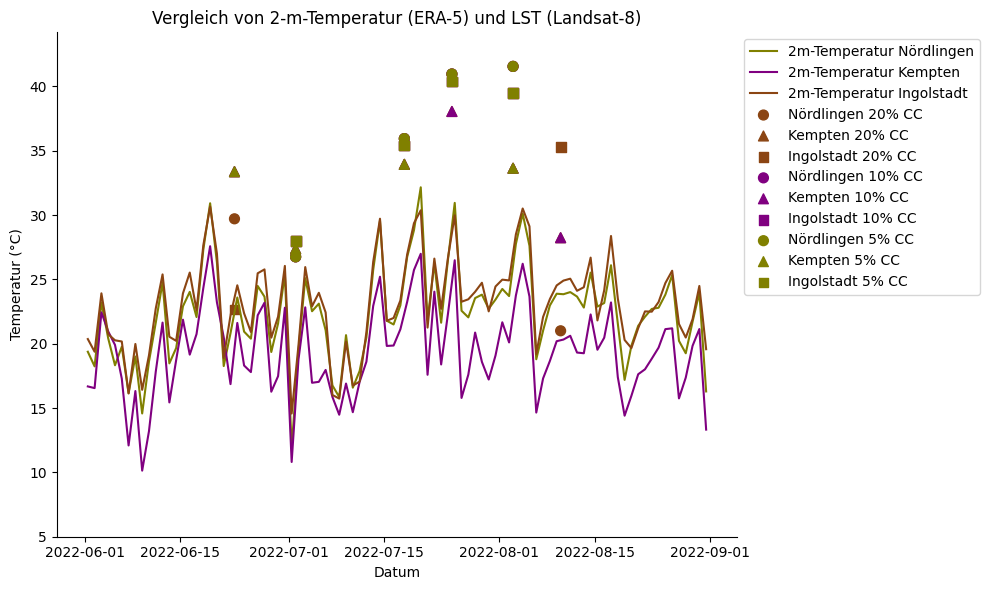

In [20]:
# Plot erstellen

fig, ax = plt.subplots(figsize=(10, 6)) # Define fig and ax using subplots


# ERA-5 Temperaturverläufe -  with assigned colors
plt.plot(df_noerdlingen.index, df_noerdlingen["Temperatur (°C)"], label="2m-Temperatur Nördlingen", color="olive") # Color for Nördlingen
plt.plot(df_kempten.index, df_kempten["Temperatur (°C)"], label="2m-Temperatur Kempten", color="purple") # Color for Kempten
plt.plot(df_ingolstadt.index, df_ingolstadt["Temperatur (°C)"], label="2m-Temperatur Ingolstadt", color="saddlebrown") # Color for Ingolstadt


# LST Werte als Signatur
plt.scatter(landsat_dates_noerdlingen, lst_values_noerdlingen_20, marker="o", color="saddlebrown", label="Nördlingen 20% CC", s=50, linestyle='')
plt.scatter(landsat_dates_kempten, lst_values_kempten_20, marker="^", color="saddlebrown", label="Kempten 20% CC", s=50, linestyle='')
plt.scatter(landsat_dates_ingolstadt, lst_values_ingolstadt_20, marker="s", color="saddlebrown", label="Ingolstadt 20% CC", s=50, linestyle='')

plt.scatter(landsat_dates_noerdlingen, lst_values_noerdlingen_10, marker="o", color="purple", label="Nördlingen 10% CC", s=50, linestyle='')
plt.scatter(landsat_dates_kempten, lst_values_kempten_10, marker="^", color="purple", label="Kempten 10% CC", s=50, linestyle='')
plt.scatter(landsat_dates_ingolstadt, lst_values_ingolstadt_10, marker="s", color="purple", label="Ingolstadt 10% CC", s=50, linestyle='')

plt.scatter(landsat_dates_noerdlingen, lst_values_noerdlingen_5, marker="o", color="olive", label="Nördlingen 5% CC", s=50, linestyle='')
plt.scatter(landsat_dates_kempten, lst_values_kempten_5, marker="^", color="olive", label="Kempten 5% CC", s=50, linestyle='')
plt.scatter(landsat_dates_ingolstadt, lst_values_ingolstadt_5, marker="s", color="olive", label="Ingolstadt 5% CC", s=50, linestyle='')

# Plot konfigurieren
plt.xlabel("Datum")
plt.ylabel("Temperatur (°C)")
plt.title("Vergleich von 2-m-Temperatur (ERA-5) und LST (Landsat-8)")
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Legende außerhalb des Plots

ax.spines['right'].set_visible(False)  # Rechten Rahmen ausblenden
ax.spines['top'].set_visible(False)    # Oberen Rahmen ausblenden

ax.grid(False)
plt.grid(False)

# Set y-axis limits to positive values
plt.ylim(5, plt.ylim()[1])  # Keep the upper limit as it is

plt.tight_layout()  # Layout anpassen, um Legende anzuzeigen
plt.show()

=> bei höherem Cloud Cover kältere Ergebnisse

übereinstimmende rosa und ockerfarbene Werte verschwinden hinter grünen

